# Tugas FGD

## Member of Group

- Federico Matthew Pratama (233405001)
- Fernando Perry (233406005)

## Diskusi dengan Asisten

[CHAT](https://github.com/copilot/share/0809129e-0040-84d5-8903-380784520161) dengan AI (Github Copilot).

[CHAT BERIKUTNYA](https://github.com/copilot/share/c87a0108-09a0-88c3-a912-d20a040c0061) dengan AI (Github Copilot)

## No 1. Finite State Automata untuk mengenali tanggal

In [ ]:
class FlexibleDateFSA:
    def __init__(self):
        # States of the FSA
        self.INITIAL = 0
        self.DAY_FIRST = 1
        self.DAY_SECOND = 2
        self.FIRST_SEP = 3
        self.MONTH_FIRST = 4
        self.MONTH_SECOND = 5
        self.SECOND_SEP = 6
        self.YEAR_FIRST = 7
        self.YEAR_SECOND = 8
        self.YEAR_THIRD = 9
        self.YEAR_FOURTH = 10
        self.ACCEPT_YY = 11    # Accept state for 2-digit year
        self.ACCEPT_YYYY = 12  # Accept state for 4-digit year
        self.REJECT = 13

        self.current_state = self.INITIAL
        self.input_buffer = ""
        self.first_separator = None  # Store first separator to ensure consistency

    def reset(self):
        """Reset the FSA to initial state"""
        self.current_state = self.INITIAL
        self.input_buffer = ""
        self.first_separator = None

    def is_digit(self, char):
        """Check if character is a digit"""
        return char.isdigit()

    def is_separator(self, char):
        """Check if character is a valid separator"""
        return char in ['-', '/']

    def is_valid_day_first_digit(self, digit):
        """Check if first digit of day is valid (0-3)"""
        return digit in ['0', '1', '2', '3']

    def is_valid_day_second_digit(self, first_digit, second_digit):
        """Check if second digit of day is valid based on first digit"""
        if first_digit == '0':
            return second_digit in ['1', '2', '3', '4', '5', '6', '7', '8', '9']
        elif first_digit in ['1', '2']:
            return second_digit in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        elif first_digit == '3':
            return second_digit in ['0', '1']
        return False

    def is_valid_month_first_digit(self, digit):
        """Check if first digit of month is valid (0-1)"""
        return digit in ['0', '1']

    def is_valid_month_second_digit(self, first_digit, second_digit):
        """Check if second digit of month is valid based on first digit"""
        if first_digit == '0':
            return second_digit in ['1', '2', '3', '4', '5', '6', '7', '8', '9']
        elif first_digit == '1':
            return second_digit in ['0', '1', '2']
        return False

    def transition(self, char):
        """Process a single character and transition to next state"""
        if self.current_state == self.REJECT:
            return self.current_state

        if self.current_state == self.INITIAL:
            if self.is_digit(char) and self.is_valid_day_first_digit(char):
                self.current_state = self.DAY_FIRST
                self.input_buffer += char
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.DAY_FIRST:
            if self.is_digit(char) and self.is_valid_day_second_digit(self.input_buffer[0], char):
                self.current_state = self.DAY_SECOND
                self.input_buffer += char
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.DAY_SECOND:
            if self.is_separator(char):
                self.current_state = self.FIRST_SEP
                self.input_buffer += char
                self.first_separator = char  # Remember the first separator
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.FIRST_SEP:
            if self.is_digit(char) and self.is_valid_month_first_digit(char):
                self.current_state = self.MONTH_FIRST
                self.input_buffer += char
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.MONTH_FIRST:
            if self.is_digit(char) and self.is_valid_month_second_digit(self.input_buffer[3], char):
                self.current_state = self.MONTH_SECOND
                self.input_buffer += char
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.MONTH_SECOND:
            # Must use the same separator as the first one
            if char == self.first_separator:
                self.current_state = self.SECOND_SEP
                self.input_buffer += char
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.SECOND_SEP:
            if self.is_digit(char):
                self.current_state = self.YEAR_FIRST
                self.input_buffer += char
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.YEAR_FIRST:
            if self.is_digit(char):
                self.current_state = self.YEAR_SECOND
                self.input_buffer += char
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.YEAR_SECOND:
            if self.is_digit(char):
                self.current_state = self.YEAR_THIRD
                self.input_buffer += char
            else:
                # Could be end of 2-digit year (yy format)
                self.current_state = self.ACCEPT_YY
                return self.process_end_of_input()

        elif self.current_state == self.YEAR_THIRD:
            if self.is_digit(char):
                self.current_state = self.YEAR_FOURTH
                self.input_buffer += char
            else:
                self.current_state = self.REJECT

        elif self.current_state == self.YEAR_FOURTH:
            # 4-digit year complete, any additional character leads to reject
            self.current_state = self.ACCEPT_YYYY
            return self.process_end_of_input()

        elif self.current_state in [self.ACCEPT_YY, self.ACCEPT_YYYY]:
            # Once we reach accept state, any additional character leads to reject
            self.current_state = self.REJECT

        return self.current_state

    def process_end_of_input(self):
        """Handle end of input to determine final state"""
        if self.current_state == self.YEAR_SECOND:
            # 2-digit year is complete
            return self.ACCEPT_YY
        elif self.current_state == self.YEAR_FOURTH:
            # 4-digit year is complete
            return self.ACCEPT_YYYY
        else:
            return self.current_state

    def process_string(self, input_string):
        """Process entire string and return if it's a valid date"""
        self.reset()

        for char in input_string:
            self.transition(char)
            if self.current_state == self.REJECT:
                return False

        # Handle end of string
        if self.current_state == self.YEAR_SECOND:
            self.current_state = self.ACCEPT_YY
        elif self.current_state == self.YEAR_FOURTH:
            self.current_state = self.ACCEPT_YYYY

        return self.current_state in [self.ACCEPT_YY, self.ACCEPT_YYYY]

    def get_state_name(self, state):
        """Get human-readable state name"""
        state_names = {
            0: "INITIAL",
            1: "DAY_FIRST",
            2: "DAY_SECOND",
            3: "FIRST_SEP",
            4: "MONTH_FIRST",
            5: "MONTH_SECOND",
            6: "SECOND_SEP",
            7: "YEAR_FIRST",
            8: "YEAR_SECOND",
            9: "YEAR_THIRD",
            10: "YEAR_FOURTH",
            11: "ACCEPT_YY",
            12: "ACCEPT_YYYY",
            13: "REJECT"
        }
        return state_names.get(state, "UNKNOWN")

    def get_date_info(self, input_string):
        """Process string and return detailed information about the date"""
        if not self.process_string(input_string):
            return {"valid": False, "reason": "Invalid format"}

        # Parse the components
        parts = input_string.replace('-', '/').split('/')
        day = parts[0]
        month = parts[1]
        year = parts[2]

        year_type = "2-digit" if len(year) == 2 else "4-digit"
        separator = '-' if '-' in input_string else '/'

        return {
            "valid": True,
            "day": day,
            "month": month,
            "year": year,
            "year_type": year_type,
            "separator": separator,
            "format": f"dd{separator}mm{separator}{'yy' if len(year) == 2 else 'yyyy'}"
        }


# Enhanced test suite
def test_flexible_date_fsa():
    fsa = FlexibleDateFSA()

    print("=== FLEXIBLE DATE FSA TESTS ===\n")

    # Test valid dates with different formats
    valid_dates = [
        # dd/mm/yyyy format
        ("01/01/2023", "4-digit year with slash"),
        ("31/12/1999", "4-digit year with slash"),
        ("15/06/2024", "4-digit year with slash"),
        ("29/02/2020", "4-digit year with slash"),

        # dd-mm-yyyy format
        ("01-01-2023", "4-digit year with dash"),
        ("31-12-1999", "4-digit year with dash"),
        ("15-06-2024", "4-digit year with dash"),
        ("29-02-2020", "4-digit year with dash"),

        # dd/mm/yy format
        ("01/01/23", "2-digit year with slash"),
        ("31/12/99", "2-digit year with slash"),
        ("15/06/24", "2-digit year with slash"),
        ("29/02/20", "2-digit year with slash"),

        # dd-mm-yy format
        ("01-01-23", "2-digit year with dash"),
        ("31-12-99", "2-digit year with dash"),
        ("15-06-24", "2-digit year with dash"),
        ("29-02-20", "2-digit year with dash"),
    ]

    # Test invalid dates
    invalid_dates = [
        # Invalid day/month ranges
        ("32/01/2023", "Invalid day > 31"),
        ("01/13/2023", "Invalid month > 12"),
        ("00/01/2023", "Invalid day = 00"),
        ("01/00/2023", "Invalid month = 00"),

        # Wrong format
        ("1/1/2023", "Single digit day/month"),
        ("01/1/2023", "Single digit month"),
        ("1/01/2023", "Single digit day"),

        # Mixed separators
        ("01/01-2023", "Mixed separators"),
        ("01-01/2023", "Mixed separators"),

        # Wrong separators
        ("01.01.2023", "Dot separator"),
        ("01 01 2023", "Space separator"),
        ("01:01:2023", "Colon separator"),

        # Wrong year length
        ("01/01/202", "3-digit year"),
        ("01/01/20233", "5-digit year"),
        ("01/01/2", "1-digit year"),

        # Non-numeric
        ("ab/cd/efgh", "All letters"),
        ("01/ab/2023", "Letters in month"),
        ("ab/01/2023", "Letters in day"),
        ("01/01/abcd", "Letters in year"),

        # Empty/incomplete
        ("", "Empty string"),
        ("01", "Incomplete - day only"),
        ("01/", "Incomplete - day + separator"),
        ("01/01", "Incomplete - day + month"),
        ("01/01/", "Incomplete - missing year"),
    ]

    print("VALID DATE TESTS:")
    print("-" * 50)
    for date, description in valid_dates:
        result = fsa.process_string(date)
        info = fsa.get_date_info(date)
        status = "✓ PASS" if result else "✗ FAIL"
        print(f"{status} '{date}' ({description})")
        if result:
            print(f"      Format: {info['format']}, Day: {info['day']}, Month: {info['month']}, Year: {info['year']}")
        print()

    print("\nINVALID DATE TESTS:")
    print("-" * 50)
    for date, description in invalid_dates:
        result = fsa.process_string(date)
        status = "✓ PASS" if not result else "✗ FAIL"
        print(f"{status} '{date}' ({description}) -> {'REJECTED' if not result else 'INCORRECTLY ACCEPTED'}")

    print(f"\n=== SUMMARY ===")
    valid_count = sum(1 for date, _ in valid_dates if fsa.process_string(date))
    invalid_count = sum(1 for date, _ in invalid_dates if not fsa.process_string(date))

    print(f"Valid dates correctly accepted: {valid_count}/{len(valid_dates)}")
    print(f"Invalid dates correctly rejected: {invalid_count}/{len(invalid_dates)}")
    print(f"Overall accuracy: {(valid_count + invalid_count)}/{len(valid_dates) + len(invalid_dates)}")


# Interactive test function
def interactive_test():
    fsa = FlexibleDateFSA()

    print("\n=== INTERACTIVE DATE VALIDATOR ===")
    print("Enter dates to validate (or 'quit' to exit)")
    print("Supported formats: dd/mm/yyyy, dd-mm-yyyy, dd/mm/yy, dd-mm-yy")
    print("-" * 50)

    while True:
        date_input = input("Enter date: ").strip()

        if date_input.lower() in ['quit', 'exit', 'q']:
            break

        if not date_input:
            continue

        result = fsa.process_string(date_input)

        if result:
            info = fsa.get_date_info(date_input)
            print(f"✓ VALID: {date_input}")
            print(f"  Format: {info['format']}")
            print(f"  Day: {info['day']}, Month: {info['month']}, Year: {info['year']} ({info['year_type']})")
            print(f"  Separator: '{info['separator']}'")
        else:
            print(f"✗ INVALID: {date_input}")

        print()


if __name__ == "__main__":
    test_flexible_date_fsa()
    interactive_test()

=== FLEXIBLE DATE FSA TESTS ===

VALID DATE TESTS:
--------------------------------------------------
✓ PASS '01/01/2023' (4-digit year with slash)
      Format: dd/mm/yyyy, Day: 01, Month: 01, Year: 2023

✓ PASS '31/12/1999' (4-digit year with slash)
      Format: dd/mm/yyyy, Day: 31, Month: 12, Year: 1999

✓ PASS '15/06/2024' (4-digit year with slash)
      Format: dd/mm/yyyy, Day: 15, Month: 06, Year: 2024

✓ PASS '29/02/2020' (4-digit year with slash)
      Format: dd/mm/yyyy, Day: 29, Month: 02, Year: 2020

✓ PASS '01-01-2023' (4-digit year with dash)
      Format: dd-mm-yyyy, Day: 01, Month: 01, Year: 2023

✓ PASS '31-12-1999' (4-digit year with dash)
      Format: dd-mm-yyyy, Day: 31, Month: 12, Year: 1999

✓ PASS '15-06-2024' (4-digit year with dash)
      Format: dd-mm-yyyy, Day: 15, Month: 06, Year: 2024

✓ PASS '29-02-2020' (4-digit year with dash)
      Format: dd-mm-yyyy, Day: 29, Month: 02, Year: 2020

✓ PASS '01/01/23' (2-digit year with slash)
      Format: dd/mm/yy, Da

## No 2. Calculate Probabilitas Sentiment Analysis (Naive bayes)

Contoh Data dari Comment Steam (Tidak digunakan)

In [ ]:
import pandas
data = pandas.read_csv("cod-mw3.csv")
print(data)

training_docs = data["comment"]
training_labels = data["type"]

                                             comment      type
0  For a $70 game the optimization is ATROCIOUS! ...  negative
1  bought this game and the first time i load in ...  negative
2  Hot take but it is definitely my favorite fps ...  positive
3  MWIII 2023 Review: The game is good, they brou...  positive
4  I was an idiot. I wanted a modern call of duty...  negative
5  Tought I'd buy a new COD when I bought my new ...  negative
6  Actually... It's not that bad. Does feel like ...  positive
7  Terrible online multiplayer. Everyone is too q...  negative
8  l like this game i dont like the bugs but i li...  positive
9                                    nice buy bo6 to  positive


In [ ]:
import math
import re
from collections import defaultdict, Counter

class NaiveBayesSentimentAnalyzer:
    def __init__(self, alpha=1.0):
        """
        Initialize Naive Bayes Sentiment Analyzer
        alpha: Laplace smoothing parameter (default=1.0)
        """
        self.alpha = alpha
        self.vocabulary = set()
        self.class_counts = defaultdict(int)
        self.word_counts = defaultdict(lambda: defaultdict(int))
        self.class_word_totals = defaultdict(int)
        self.total_docs = 0
        self.trained = False

    def preprocess_text(self, text):
        """
        Preprocess text: lowercase, remove punctuation, tokenize
        """
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Split into words
        words = text.split()
        # Remove empty strings
        words = [word for word in words if word.strip()]
        return words

    def train(self, documents, labels):
        """
        Train the Naive Bayes classifier
        documents: list of text documents
        labels: list of corresponding sentiment labels
        """
        print("🚀 Starting training process...")

        # Reset all counters
        self.vocabulary = set()
        self.class_counts = defaultdict(int)
        self.word_counts = defaultdict(lambda: defaultdict(int))
        self.class_word_totals = defaultdict(int)
        self.total_docs = len(documents)

        # Process each document
        for doc, label in zip(documents, labels):
            # Preprocess document
            words = self.preprocess_text(doc)

            # Count class occurrences
            self.class_counts[label] += 1

            # Count words in each class
            for word in words:
                self.vocabulary.add(word)
                self.word_counts[label][word] += 1
                self.class_word_totals[label] += 1

        self.trained = True
        print("✅ Training completed successfully!")

        # Print training summary
        self.print_training_summary()

    def print_training_summary(self):
        """Print detailed training statistics"""
        print("\n" + "="*80)
        print("📊 NAIVE BAYES TRAINING SUMMARY")
        print("="*80)
        print(f"Total documents: {self.total_docs}")
        print(f"Vocabulary size: {len(self.vocabulary)}")
        print(f"Classes: {list(self.class_counts.keys())}")

        print(f"\n📈 Class Distribution:")
        for class_name, count in self.class_counts.items():
            percentage = (count / self.total_docs) * 100
            print(f"  {class_name.upper()}: {count} docs ({percentage:.1f}%)")

        print(f"\n📚 Word Statistics per Class:")
        for class_name in self.class_counts.keys():
            total_words = self.class_word_totals[class_name]
            unique_words = len(self.word_counts[class_name])
            print(f"  {class_name.upper()}: {total_words} total words, {unique_words} unique words")

        print(f"\n🔤 Sample vocabulary: {list(self.vocabulary)[:20]}...")

    def calculate_log_probability(self, words, class_name):
        """
        Calculate log probability P(words|class) with Laplace smoothing
        """
        log_prob = 0.0
        vocab_size = len(self.vocabulary)
        class_total_words = self.class_word_totals[class_name]

        for word in words:
            # Count of word in this class
            word_count = self.word_counts[class_name][word]

            # Laplace smoothing: (count + alpha) / (total + alpha * vocab_size)
            word_prob = (word_count + self.alpha) / (class_total_words + self.alpha * vocab_size)

            # Add log probability (to avoid underflow)
            log_prob += math.log(word_prob)

        return log_prob

    def predict_single(self, text, verbose=False):
        """
        Predict sentiment for a single text
        """
        if not self.trained:
            raise ValueError("Model must be trained before prediction!")

        # Preprocess text
        words = self.preprocess_text(text)

        if verbose:
            print(f"\n🔍 === PREDICTING SENTIMENT FOR: '{text}' ===")
            print(f"📝 Tokenized words: {words}")

        # Calculate posterior probabilities for each class
        class_log_probs = {}

        for class_name in self.class_counts.keys():
            # Prior probability: P(class)
            prior_prob = self.class_counts[class_name] / self.total_docs
            log_prior = math.log(prior_prob)

            # Likelihood: P(words|class)
            log_likelihood = self.calculate_log_probability(words, class_name)

            # Posterior: P(class|words) ∝ P(class) * P(words|class)
            log_posterior = log_prior + log_likelihood
            class_log_probs[class_name] = log_posterior

            if verbose:
                print(f"\n📊 --- CALCULATING P({class_name}|document) ---")
                print(f"🎯 Prior P({class_name}) = {self.class_counts[class_name]}/{self.total_docs} = {prior_prob:.4f}")
                print(f"📈 Word Likelihoods:")

                vocab_size = len(self.vocabulary)
                class_total_words = self.class_word_totals[class_name]

                for word in words:
                    word_count = self.word_counts[class_name][word]
                    word_prob = (word_count + self.alpha) / (class_total_words + self.alpha * vocab_size)
                    print(f"  P({word}|{class_name}) = ({word_count} + {self.alpha}) / ({class_total_words} + {self.alpha} * {vocab_size}) = {word_prob:.6f}")

                print(f"\n🧮 Log posterior = log({prior_prob:.4f}) + {log_likelihood:.4f} = {log_posterior:.4f}")

        # Convert log probabilities to normal probabilities and normalize
        max_log_prob = max(class_log_probs.values())
        class_probs = {}
        total_prob = 0.0

        for class_name, log_prob in class_log_probs.items():
            # Subtract max to avoid overflow, then exponentiate
            prob = math.exp(log_prob - max_log_prob)
            class_probs[class_name] = prob
            total_prob += prob

        # Normalize probabilities
        for class_name in class_probs:
            class_probs[class_name] /= total_prob

        # Find best prediction
        best_class = max(class_probs, key=class_probs.get)
        confidence = class_probs[best_class] * 100

        if verbose:
            print(f"\n🎉 === FINAL RESULTS ===")
            print(f"📊 Normalized probabilities:")
            for class_name, prob in class_probs.items():
                emoji = "🟢" if class_name == best_class else "🔴"
                print(f"  {emoji} P({class_name}|document) = {prob:.6f} ({prob*100:.2f}%)")

            print(f"\n🏆 Predicted sentiment: {best_class.upper()}")
            print(f"💪 Confidence: {confidence:.2f}%")

        return {
            'prediction': best_class,
            'confidence': confidence,
            'probabilities': class_probs
        }

    def predict_batch(self, texts, verbose=False):
        """
        Predict sentiment for multiple texts
        """
        results = []

        if verbose:
            print("\n🚀 === BATCH PREDICTION ===\n")

        for i, text in enumerate(texts, 1):
            if verbose:
                print(f"📄 Document {i}: '{text}'")

            result = self.predict_single(text, verbose=verbose)
            results.append(result)

            if verbose:
                print("-" * 60 + "\n")

        return results

    def interactive_mode(self):
        """
        Interactive mode for testing sentiment analysis
        """
        print("\n🎮 === INTERACTIVE SENTIMENT ANALYSIS ===")
        print("Enter text to analyze sentiment")
        print("Type 'quit', 'exit', or 'q' to exit")
        print("-" * 50)

        while True:
            try:
                text = input("\n📝 Enter text: ").strip()

                if text.lower() in ['quit', 'exit', 'q', '0']:
                    break

                if not text:
                    print("⚠️ Please enter some text!")
                    continue

                # Predict with verbose output
                result = self.predict_single(text, verbose=True)

            except KeyboardInterrupt:
                print("\n\n👋 Goodbye!")
                break
            except Exception as e:
                print(f"❌ Error: {e}")

        print("\n" + "="*50)
        print("🎉 Thank you for using Sentiment Analyzer!")
        print("✨ Have a great day! ✨")
        print("="*50)

# Training data - Bahasa umum sehari-hari
training_docs = [
    # POSITIVE SENTIMENT (50 items)
    "hari ini cuaca sangat bagus dan cerah",
    "makanan di restoran ini enak sekali",
    "pelayanan sangat baik dan ramah",
    "tempat ini bersih dan nyaman",
    "harga produk ini murah dan terjangkau",
    "kualitas barang sangat bagus dan awet",
    "pengalaman berbelanja menyenangkan sekali",
    "staff sangat membantu dan profesional",
    "lokasi strategis dan mudah dijangkau",
    "fasilitas lengkap dan modern",
    "suasana tenang dan damai",
    "pemandangan indah dan menakjubkan",
    "udara segar dan sejuk",
    "jalan raya lancar tidak macet",
    "transportasi umum nyaman dan bersih",
    "internet cepat dan stabil",
    "listrik tidak pernah mati",
    "air bersih dan jernih",
    "lingkungan aman dan tentram",
    "tetangga ramah dan baik hati",
    "teman-teman supportif dan loyal",
    "keluarga harmonis dan bahagia",
    "kesehatan tubuh prima dan bugar",
    "mood hari ini sangat bagus",
    "tidur nyenyak dan berkualitas",
    "bangun pagi segar dan berenergi",
    "sarapan lezat dan bergizi",
    "kerja lancar tanpa kendala",
    "gaji naik dan bonus besar",
    "liburan menyenangkan dan refreshing",
    "hobi baru sangat menarik",
    "belajar hal baru mudah dipahami",
    "olahraga rutin membuat sehat",
    "belanja dapat diskon besar",
    "dapat hadiah surprise menarik",
    "ulang tahun meriah dan seru",
    "acara keluarga sukses dan lancar",
    "pertemuan teman lama menyenangkan",
    "pekerjaan baru lebih baik",
    "rumah baru nyaman dan strategis",
    "kendaraan baru irit dan handal",
    "gadget baru canggih dan mudah",
    "aplikasi baru berguna dan praktis",
    "game baru seru dan menghibur",
    "buku baru menarik dan inspiratif",
    "musik baru enak didengar",
    "hasil ujian bagus dan memuaskan",
    "prestasi gemilang patut dibanggakan",
    "target tercapai tepat waktu",
    "masalah terselesaikan dengan baik",

    # NEGATIVE SENTIMENT (50 items)
    "hari ini cuaca buruk hujan terus",
    "makanan di warung ini tidak enak",
    "pelayanan lambat dan tidak ramah",
    "tempat kotor dan tidak nyaman",
    "harga barang mahal tidak masuk akal",
    "kualitas produk jelek dan cepat rusak",
    "pengalaman belanja mengecewakan sekali",
    "staff kasar dan tidak membantu",
    "lokasi terpencil sulit dijangkau",
    "fasilitas rusak dan tidak terawat",
    "suasana berisik dan mengganggu",
    "pemandangan jelek dan kumuh",
    "udara kotor dan pengap",
    "jalan macet parah setiap hari",
    "transportasi umum kotor dan semrawut",
    "internet lemot dan sering putus",
    "listrik sering mati tidak stabil",
    "air keruh dan berbau",
    "lingkungan tidak aman banyak kejahatan",
    "tetangga galak dan tidak ramah",
    "teman-teman toxic dan menyebalkan",
    "keluarga sering bertengkar tidak rukun",
    "kesehatan menurun sering sakit",
    "mood buruk sepanjang hari",
    "susah tidur insomnia parah",
    "bangun telat badan pegal",
    "sarapan gosong dan tidak enak",
    "kerja stress banyak masalah",
    "gaji kecil tidak cukup hidup",
    "liburan gagal hujan terus",
    "hobi membosankan tidak menarik",
    "belajar susah tidak paham",
    "malas olahraga badan sakit",
    "belanja boros habis banyak uang",
    "tidak dapat hadiah kecewa",
    "ulang tahun sepi tidak ada yang datang",
    "acara gagal total berantakan",
    "teman lama sudah berubah sombong",
    "pekerjaan baru ternyata buruk",
    "rumah baru bocor dan sempit",
    "kendaraan rusak terus mogok",
    "gadget lemot dan sering hang",
    "aplikasi error tidak bisa dipakai",
    "game boring tidak seru",
    "buku membosankan susah dipahami",
    "musik berisik tidak enak didengar",
    "hasil ujian jelek mengecewakan",
    "gagal total tidak ada prestasi",
    "target meleset jauh dari harapan",
    "masalah bertambah semakin rumit",
]

training_labels = [
    # POSITIVE LABELS (50 items)
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",
    "positive", "positive", "positive", "positive", "positive",

    # NEGATIVE LABELS (50 items)
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
    "negative", "negative", "negative", "negative", "negative",
]

def demonstrate_naive_bayes():
    """
    Demonstrasi lengkap Naive Bayes Sentiment Analysis
    """
    print("🤖 NAIVE BAYES SENTIMENT ANALYZER - BAHASA UMUM")
    print("="*80)

    # Initialize analyzer
    analyzer = NaiveBayesSentimentAnalyzer(alpha=1.0)

    # Train the model
    analyzer.train(training_docs, training_labels)

    # Test dengan beberapa contoh
    test_texts = [
        "hari ini cuaca cerah dan menyenangkan",
        "makanan enak sekali saya suka",
        "pelayanan buruk dan mengecewakan",
        "tempat kotor tidak nyaman",
        "produk berkualitas bagus dan murah",
        "staff ramah membantu pelanggan",
        "internet lemot sering putus",
        "keluarga bahagia dan harmonis",
    ]

    print(f"\n🧪 === TESTING WITH SAMPLE DATA ===")
    results = analyzer.predict_batch(test_texts, verbose=True)

    # Accuracy summary
    print(f"\n📊 === PREDICTION SUMMARY ===")
    for i, (text, result) in enumerate(zip(test_texts, results), 1):
        emoji = "🟢" if result['prediction'] == 'positive' else "🔴"
        print(f"{i}. {emoji} '{text}' → {result['prediction'].upper()} ({result['confidence']:.1f}%)")

    # Interactive mode
    analyzer.interactive_mode()

if __name__ == "__main__":
    demonstrate_naive_bayes()

🤖 NAIVE BAYES SENTIMENT ANALYZER - BAHASA UMUM
🚀 Starting training process...
✅ Training completed successfully!

📊 NAIVE BAYES TRAINING SUMMARY
Total documents: 100
Vocabulary size: 232
Classes: ['positive', 'negative']

📈 Class Distribution:
  POSITIVE: 50 docs (50.0%)
  NEGATIVE: 50 docs (50.0%)

📚 Word Statistics per Class:
  POSITIVE: 230 total words, 151 unique words
  NEGATIVE: 232 total words, 159 unique words

🔤 Sample vocabulary: ['jauh', 'temanteman', 'hal', 'damai', 'musik', 'sepi', 'rumit', 'listrik', 'sarapan', 'ulang', 'sering', 'berguna', 'hujan', 'tanpa', 'mogok', 'staff', 'bugar', 'rutin', 'berubah', 'mahal']...

🧪 === TESTING WITH SAMPLE DATA ===

🚀 === BATCH PREDICTION ===

📄 Document 1: 'hari ini cuaca cerah dan menyenangkan'

🔍 === PREDICTING SENTIMENT FOR: 'hari ini cuaca cerah dan menyenangkan' ===
📝 Tokenized words: ['hari', 'ini', 'cuaca', 'cerah', 'dan', 'menyenangkan']

📊 --- CALCULATING P(positive|document) ---
🎯 Prior P(positive) = 50/100 = 0.5000
📈 Word L

## No 3. Visualisasi vector kata (Word2Vec)

CUSTOM WORD2VEC VISUALIZATION (NO GENSIM!)
Created 48 sample embeddings with 100 dimensions
Categories: ['Animals', 'Fruits', 'Colors', 'Emotions', 'Actions', 'Objects']

Vocabulary sample: ['cat', 'dog', 'elephant', 'lion', 'tiger', 'rabbit', 'horse', 'cow', 'bird', 'fish']...
Vector shape: (48, 100)

1. Testing word similarity...
Words similar to 'cat': [('horse', np.float64(0.8500001210812396)), ('cow', np.float64(0.8343363903619704)), ('elephant', np.float64(0.8092566772954088)), ('bird', np.float64(0.8060608634738762)), ('tiger', np.float64(0.798920570312316))]

2. Testing word analogy...
cat : dog :: apple : [('strawberry', np.float64(0.6837741584906897)), ('grape', np.float64(0.6785863970113428)), ('mango', np.float64(0.6489101222704737))]

3. Creating 2D visualizations...
PCA Explained Variance Ratio: [0.20784359 0.18363358]
Total Explained Variance: 0.391


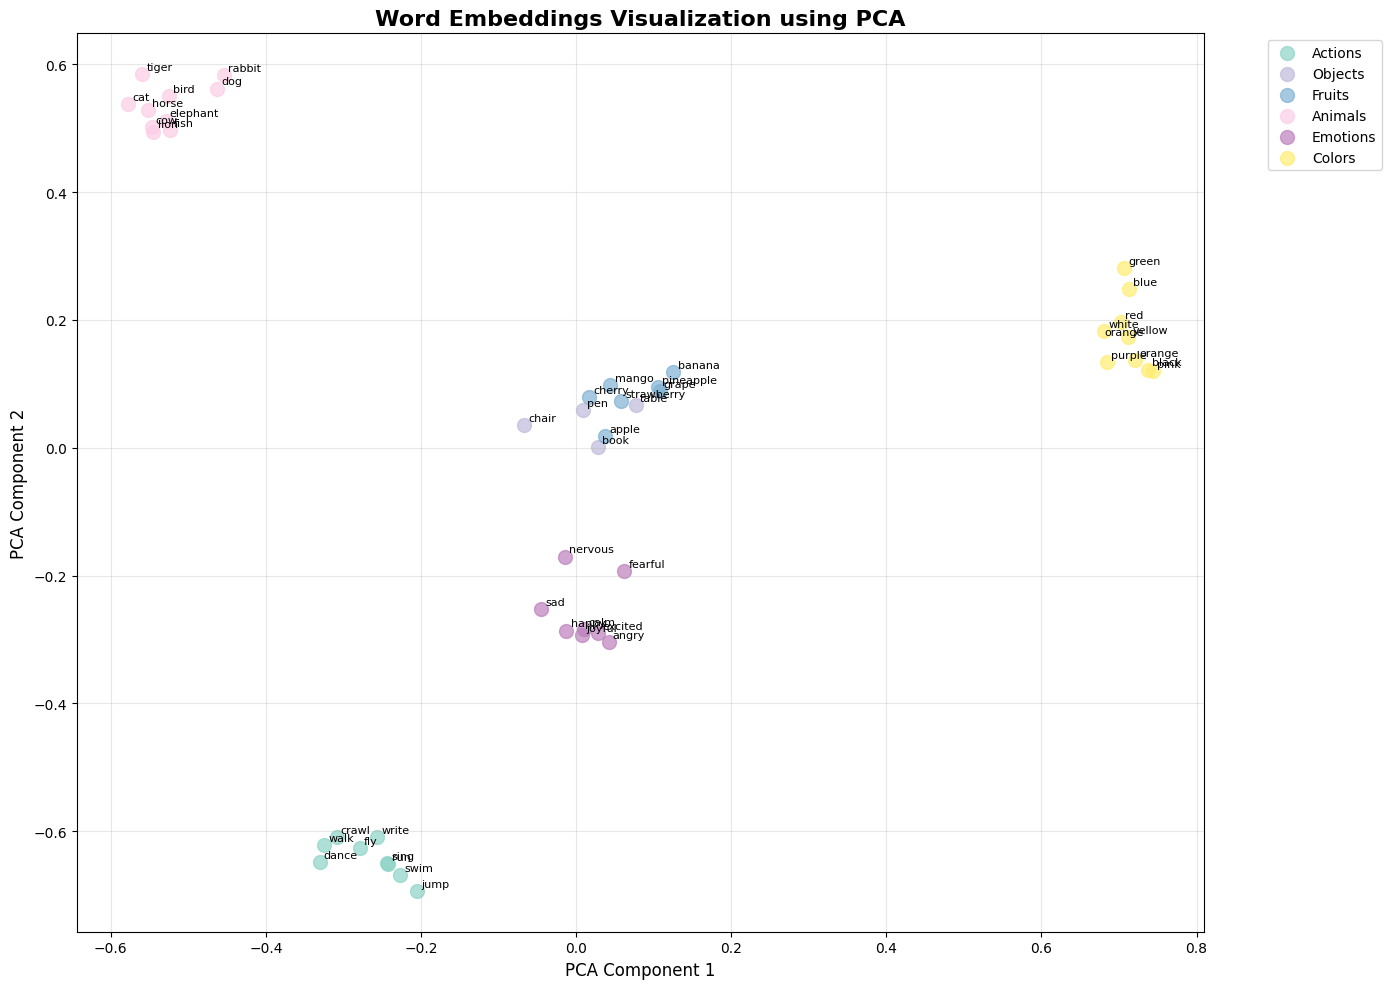

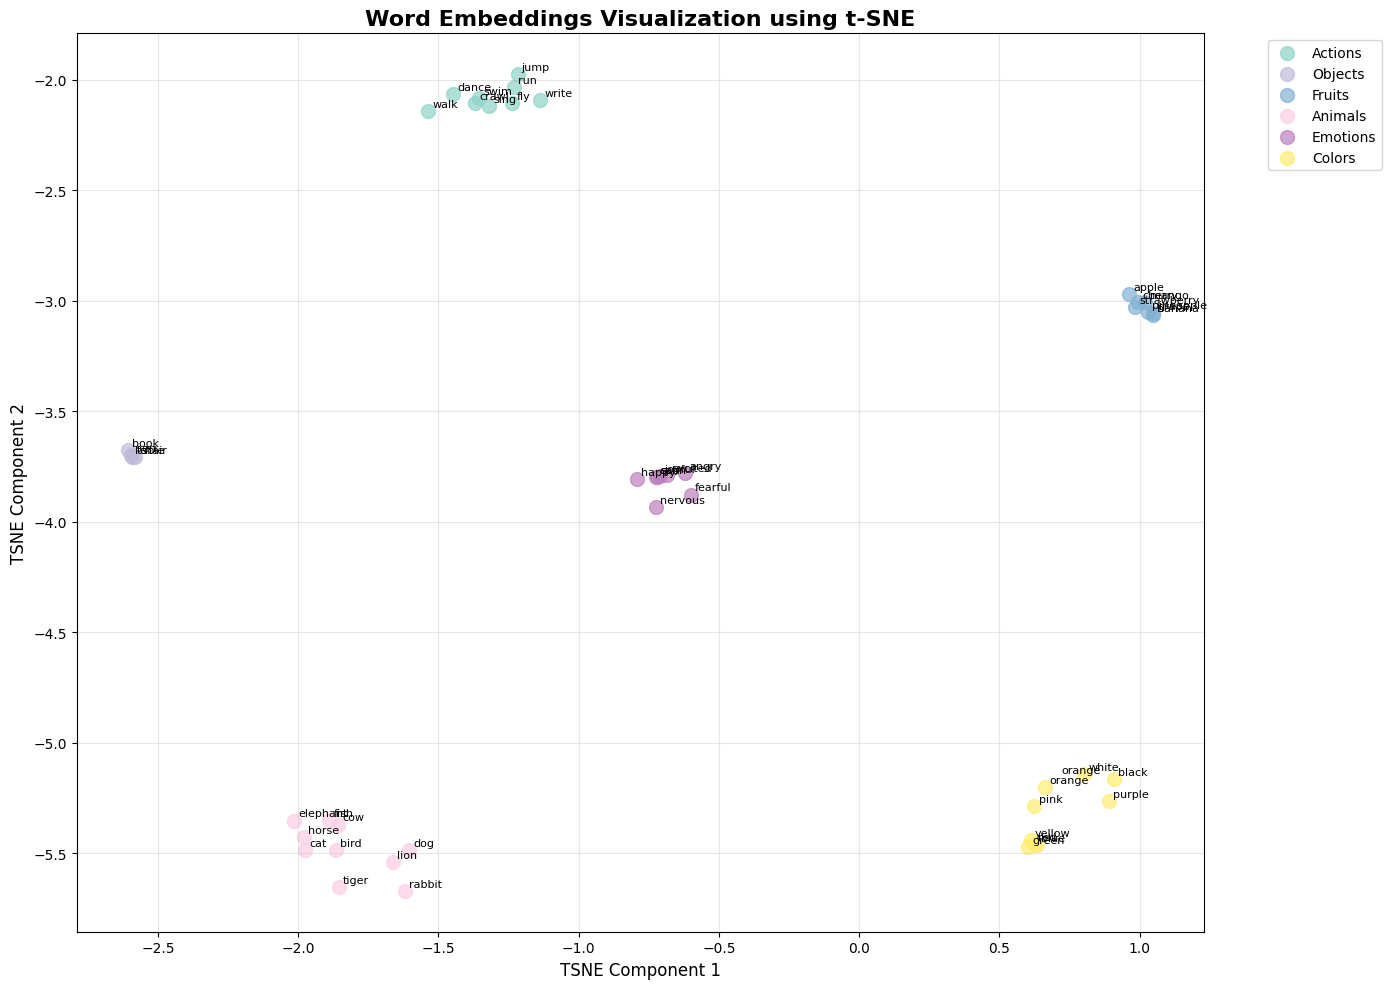


4. Creating interactive 3D visualization...
PCA Explained Variance Ratio: [0.20784359 0.18363358 0.16784696]
Total Explained Variance: 0.559



5. Creating similarity heatmap...


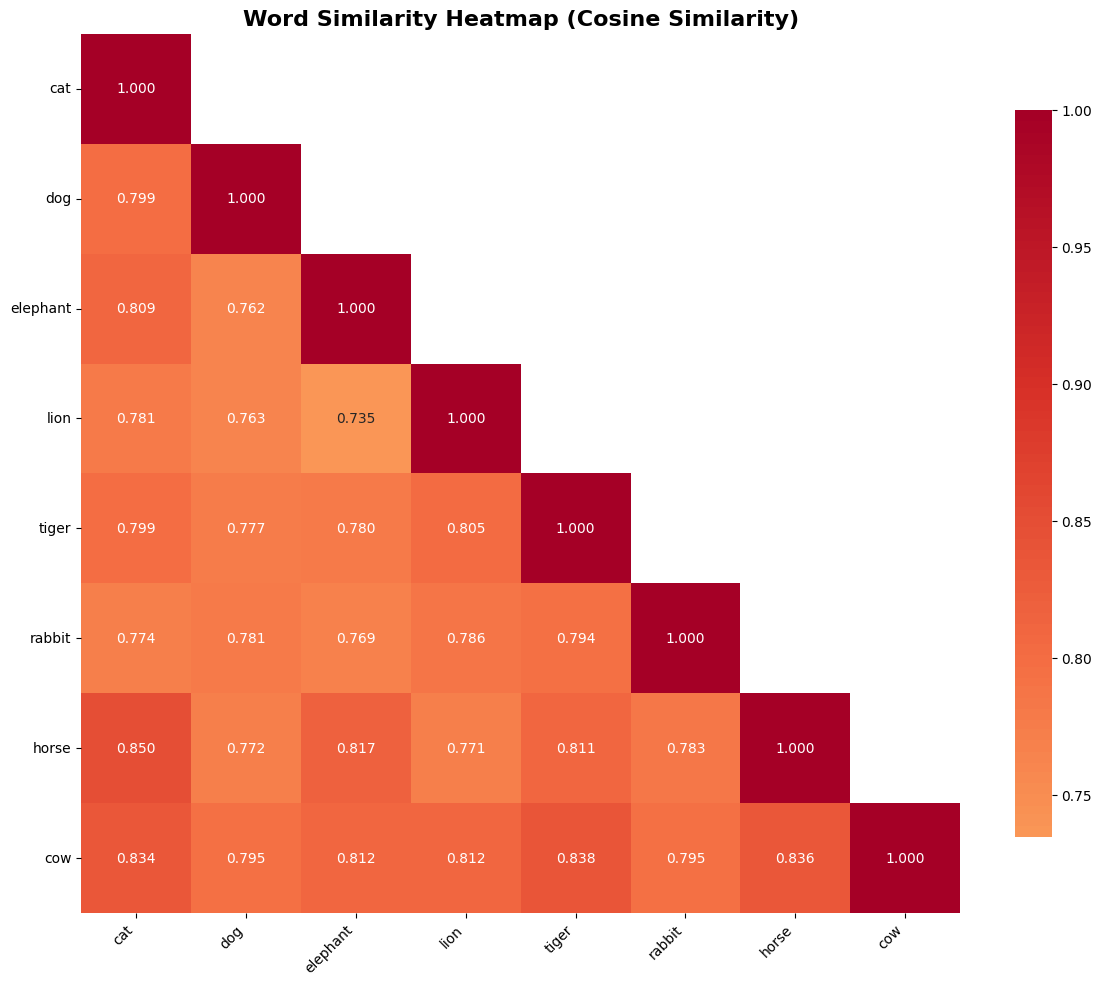


6. Analyzing word relationships...

Most similar words to 'dog':
--------------------------------------------------
 1. cat             (similarity: 0.7987)
 2. cow             (similarity: 0.7951)
 3. rabbit          (similarity: 0.7809)
 4. tiger           (similarity: 0.7766)
 5. horse           (similarity: 0.7725)
 6. lion            (similarity: 0.7629)
 7. elephant        (similarity: 0.7619)
 8. bird            (similarity: 0.7598)


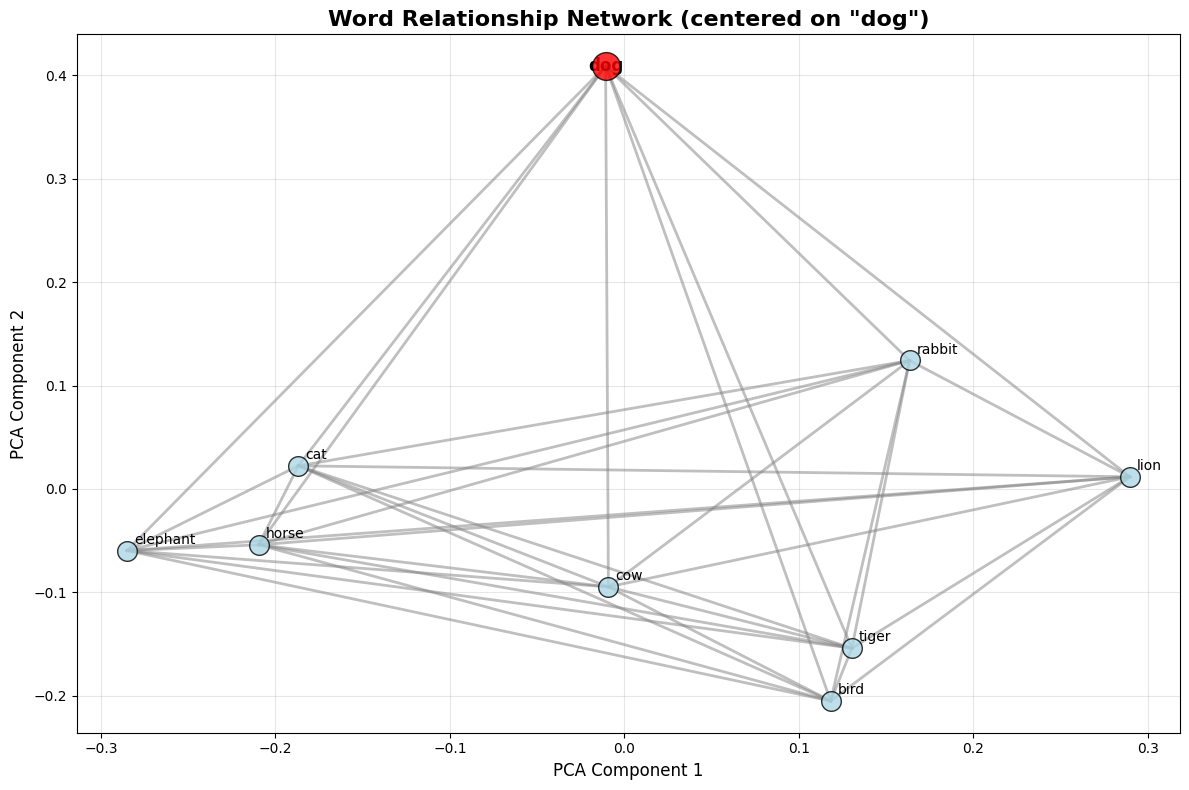


7. Creating comprehensive dashboard...
PCA Explained Variance Ratio: [0.20784359 0.18363358]
Total Explained Variance: 0.391


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
from collections import defaultdict, Counter
import warnings
warnings.filterwarnings('ignore')

class CustomWord2VecVisualizer:
    def __init__(self):
        """
        Initialize custom Word2Vec visualizer without any Gensim dependencies
        """
        self.vectors = None
        self.vocab = None
        self.word_to_index = {}
        self.index_to_word = {}
        self.vector_dim = None
        self.word_categories = {}

    def load_vectors_from_file(self, file_path, binary=False, limit=None):
        """
        Load word vectors from file (custom implementation)

        Args:
            file_path: Path to vector file
            binary: Whether file is in binary format
            limit: Maximum number of vectors to load
        """
        vectors = []
        vocab = []

        if binary:
            # Handle binary format manually
            with open(file_path, 'rb') as f:
                header = f.readline().decode('utf-8').strip()
                vocab_size, vector_size = map(int, header.split())

                for i in range(min(vocab_size, limit) if limit else vocab_size):
                    word = ""
                    while True:
                        char = f.read(1).decode('utf-8', errors='ignore')
                        if char == ' ':
                            break
                        word += char

                    vector = np.frombuffer(f.read(vector_size * 4), dtype=np.float32)
                    vectors.append(vector)
                    vocab.append(word)
        else:
            # Handle text format
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()

                for i, line in enumerate(lines):
                    if limit and i >= limit:
                        break

                    parts = line.strip().split()
                    word = parts[0]
                    vector = np.array([float(x) for x in parts[1:]])

                    vectors.append(vector)
                    vocab.append(word)

        self.vectors = np.array(vectors)
        self.vocab = vocab
        self.vector_dim = self.vectors.shape[1]
        self._build_indices()

        print(f"Loaded {len(self.vocab)} word vectors with {self.vector_dim} dimensions")

    def create_sample_embeddings(self, vocab_size=50, vector_dim=100):
        """
        Create sample word embeddings for demonstration
        """
        np.random.seed(42)

        # Define semantic categories
        categories = {
            'Animals': ['cat', 'dog', 'elephant', 'lion', 'tiger', 'rabbit', 'horse', 'cow', 'bird', 'fish'],
            'Fruits': ['apple', 'banana', 'orange', 'grape', 'strawberry', 'mango', 'pineapple', 'cherry'],
            'Colors': ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black', 'white', 'pink'],
            'Emotions': ['happy', 'sad', 'angry', 'excited', 'calm', 'nervous', 'joyful', 'fearful'],
            'Actions': ['run', 'walk', 'jump', 'swim', 'fly', 'crawl', 'dance', 'sing', 'write'],
            'Objects': ['table', 'chair', 'book', 'pen', 'computer', 'phone', 'car', 'house', 'door']
        }

        # Flatten categories to create vocabulary
        self.vocab = []
        self.word_categories = {}
        category_names = list(categories.keys())

        for category, words in categories.items():
            for word in words:
                if len(self.vocab) < vocab_size:
                    self.vocab.append(word)
                    self.word_categories[word] = category

        # Create vectors with semantic structure
        self.vectors = []

        for word in self.vocab:
            category = self.word_categories[word]
            category_idx = category_names.index(category)

            # Base random vector
            base_vector = np.random.normal(0, 0.3, vector_dim)

            # Add category-specific pattern
            category_pattern = np.zeros(vector_dim)
            start_idx = category_idx * (vector_dim // len(category_names))
            end_idx = min(start_idx + (vector_dim // len(category_names)), vector_dim)
            category_pattern[start_idx:end_idx] = np.random.normal(1.5, 0.2, end_idx - start_idx)

            # Combine and normalize
            final_vector = base_vector + category_pattern
            final_vector = final_vector / np.linalg.norm(final_vector)
            self.vectors.append(final_vector)

        self.vectors = np.array(self.vectors)
        self.vector_dim = vector_dim
        self._build_indices()

        print(f"Created {len(self.vocab)} sample embeddings with {self.vector_dim} dimensions")
        print(f"Categories: {list(categories.keys())}")

    def _build_indices(self):
        """Build word-to-index and index-to-word mappings"""
        self.word_to_index = {word: i for i, word in enumerate(self.vocab)}
        self.index_to_word = {i: word for i, word in enumerate(self.vocab)}

    def get_vector(self, word):
        """Get vector for a specific word"""
        if word in self.word_to_index:
            return self.vectors[self.word_to_index[word]]
        else:
            raise KeyError(f"Word '{word}' not found in vocabulary")

    def most_similar(self, word, top_k=10):
        """Find most similar words to given word"""
        if word not in self.word_to_index:
            print(f"Word '{word}' not found in vocabulary")
            return []

        word_vector = self.get_vector(word)
        similarities = cosine_similarity([word_vector], self.vectors)[0]

        # Get indices sorted by similarity (excluding the word itself)
        word_idx = self.word_to_index[word]
        similarities[word_idx] = -1  # Exclude self

        top_indices = np.argsort(similarities)[::-1][:top_k]

        results = []
        for idx in top_indices:
            if similarities[idx] > 0:  # Only positive similarities
                results.append((self.vocab[idx], similarities[idx]))

        return results

    def word_analogy(self, word1, word2, word3, top_k=5):
        """
        Solve word analogies: word1 is to word2 as word3 is to ?
        """
        try:
            vec1 = self.get_vector(word1)
            vec2 = self.get_vector(word2)
            vec3 = self.get_vector(word3)
        except KeyError as e:
            print(f"Error: {e}")
            return []

        # Calculate analogy vector: vec2 - vec1 + vec3
        analogy_vector = vec2 - vec1 + vec3

        # Find most similar words to analogy vector
        similarities = cosine_similarity([analogy_vector], self.vectors)[0]

        # Exclude input words
        for word in [word1, word2, word3]:
            if word in self.word_to_index:
                similarities[self.word_to_index[word]] = -1

        top_indices = np.argsort(similarities)[::-1][:top_k]

        results = []
        for idx in top_indices:
            if similarities[idx] > 0:
                results.append((self.vocab[idx], similarities[idx]))

        return results

    def reduce_dimensions_pca(self, n_components=2):
        """Reduce dimensions using PCA"""
        pca = PCA(n_components=n_components, random_state=42)
        reduced_vectors = pca.fit_transform(self.vectors)

        print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
        print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.3f}")

        return reduced_vectors, pca

    def reduce_dimensions_tsne(self, n_components=2, perplexity=30):
        """Reduce dimensions using t-SNE"""
        tsne = TSNE(n_components=n_components, perplexity=min(perplexity, len(self.vocab)-1),
                   random_state=42, n_iter=1000)
        reduced_vectors = tsne.fit_transform(self.vectors)
        return reduced_vectors, tsne

    def plot_2d_vectors(self, method='pca', figsize=(14, 10), save_path=None):
        """Create 2D visualization of word vectors"""
        if method == 'pca':
            reduced_vectors, _ = self.reduce_dimensions_pca(2)
            title = "Word Embeddings Visualization using PCA"
        else:
            reduced_vectors, _ = self.reduce_dimensions_tsne(2)
            title = "Word Embeddings Visualization using t-SNE"

        plt.figure(figsize=figsize)

        # Color by categories if available
        if hasattr(self, 'word_categories') and self.word_categories:
            unique_categories = list(set(self.word_categories.values()))
            colors = plt.cm.Set3(np.linspace(0, 1, len(unique_categories)))
            color_map = dict(zip(unique_categories, colors))

            # Plot by category
            for category in unique_categories:
                category_words = [w for w, c in self.word_categories.items() if c == category]
                category_indices = [self.word_to_index[w] for w in category_words if w in self.word_to_index]

                if category_indices:
                    category_vectors = reduced_vectors[category_indices]
                    plt.scatter(category_vectors[:, 0], category_vectors[:, 1],
                              c=[color_map[category]], s=100, alpha=0.7, label=category)

            # Add labels
            for i, word in enumerate(self.vocab):
                plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]),
                           xytext=(3, 3), textcoords='offset points', fontsize=8)

            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], s=100, alpha=0.7)
            for i, word in enumerate(self.vocab):
                plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]),
                           xytext=(3, 3), textcoords='offset points', fontsize=8)

        plt.title(title, fontsize=16, fontweight='bold')
        plt.xlabel(f'{method.upper()} Component 1', fontsize=12)
        plt.ylabel(f'{method.upper()} Component 2', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')

        plt.show()

    def plot_3d_interactive(self, method='pca'):
        """Create interactive 3D visualization"""
        if method == 'pca':
            reduced_vectors, _ = self.reduce_dimensions_pca(3)
            title = "Interactive 3D Word Embeddings (PCA)"
        else:
            reduced_vectors, _ = self.reduce_dimensions_tsne(3)
            title = "Interactive 3D Word Embeddings (t-SNE)"

        # Prepare data
        df_data = {
            'x': reduced_vectors[:, 0],
            'y': reduced_vectors[:, 1],
            'z': reduced_vectors[:, 2],
            'word': self.vocab
        }

        if hasattr(self, 'word_categories') and self.word_categories:
            df_data['category'] = [self.word_categories.get(word, 'Unknown') for word in self.vocab]
            color_col = 'category'
        else:
            color_col = None

        df = pd.DataFrame(df_data)

        fig = px.scatter_3d(df, x='x', y='y', z='z',
                           color=color_col,
                           hover_name='word',
                           title=title,
                           width=900, height=700)

        fig.update_traces(marker=dict(size=8))

        fig.update_layout(
            scene=dict(
                xaxis_title=f'{method.upper()} Component 1',
                yaxis_title=f'{method.upper()} Component 2',
                zaxis_title=f'{method.upper()} Component 3'
            ),
            font=dict(family="Arial", size=12)
        )

        fig.show()

    def plot_similarity_heatmap(self, words_subset=None, figsize=(12, 10)):
        """Create similarity heatmap"""
        if words_subset is None:
            words_subset = self.vocab[:20]  # First 20 words

        # Filter words that exist in vocabulary
        valid_words = [w for w in words_subset if w in self.word_to_index]

        if len(valid_words) < 2:
            print("Not enough valid words for heatmap")
            return

        # Get vectors for selected words
        indices = [self.word_to_index[word] for word in valid_words]
        selected_vectors = self.vectors[indices]

        # Calculate similarity matrix
        similarity_matrix = cosine_similarity(selected_vectors)

        # Create heatmap
        plt.figure(figsize=figsize)

        # Mask upper triangle
        mask = np.triu(np.ones_like(similarity_matrix, dtype=bool), k=1)

        sns.heatmap(similarity_matrix,
                   mask=mask,
                   xticklabels=valid_words,
                   yticklabels=valid_words,
                   annot=True,
                   cmap='RdYlBu_r',
                   center=0.5,
                   square=True,
                   fmt='.3f',
                   cbar_kws={"shrink": .8})

        plt.title('Word Similarity Heatmap (Cosine Similarity)', fontsize=16, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def analyze_word_relationships(self, target_word, top_k=10):
        """Analyze and visualize relationships for a specific word"""
        if target_word not in self.word_to_index:
            print(f"Word '{target_word}' not found in vocabulary")
            return

        # Get most similar words
        similar_words = self.most_similar(target_word, top_k)

        print(f"\nMost similar words to '{target_word}':")
        print("-" * 50)
        for i, (word, similarity) in enumerate(similar_words):
            print(f"{i+1:2d}. {word:<15} (similarity: {similarity:.4f})")

        # Visualize relationships
        words_to_plot = [target_word] + [word for word, _ in similar_words]
        self.plot_word_network(words_to_plot, target_word)

    def plot_word_network(self, words, center_word=None):
        """Create network visualization of word relationships"""
        # Filter valid words
        valid_words = [w for w in words if w in self.word_to_index]

        if len(valid_words) < 2:
            print("Not enough valid words for network plot")
            return

        # Get vectors and reduce dimensions
        indices = [self.word_to_index[word] for word in valid_words]
        selected_vectors = self.vectors[indices]

        # Reduce to 2D
        pca = PCA(n_components=2, random_state=42)
        positions_2d = pca.fit_transform(selected_vectors)

        # Calculate similarities
        similarity_matrix = cosine_similarity(selected_vectors)

        plt.figure(figsize=(12, 8))

        # Draw edges for high similarities
        threshold = 0.6
        for i in range(len(valid_words)):
            for j in range(i+1, len(valid_words)):
                if similarity_matrix[i, j] > threshold:
                    plt.plot([positions_2d[i, 0], positions_2d[j, 0]],
                            [positions_2d[i, 1], positions_2d[j, 1]],
                            'gray', alpha=0.5, linewidth=2)

        # Draw nodes
        if center_word and center_word in valid_words:
            center_idx = valid_words.index(center_word)

            for i, (word, pos) in enumerate(zip(valid_words, positions_2d)):
                if i == center_idx:
                    plt.scatter(pos[0], pos[1], s=400, c='red', alpha=0.8, zorder=5, edgecolors='black')
                    plt.annotate(word, pos, xytext=(0, 0), textcoords='offset points',
                               fontsize=12, fontweight='bold', ha='center', va='center')
                else:
                    plt.scatter(pos[0], pos[1], s=200, c='lightblue', alpha=0.8, zorder=4, edgecolors='black')
                    plt.annotate(word, pos, xytext=(5, 5), textcoords='offset points',
                               fontsize=10, ha='left')
        else:
            for word, pos in zip(valid_words, positions_2d):
                plt.scatter(pos[0], pos[1], s=200, c='lightblue', alpha=0.8, zorder=4, edgecolors='black')
                plt.annotate(word, pos, xytext=(5, 5), textcoords='offset points',
                           fontsize=10, ha='left')

        center_text = f' (centered on "{center_word}")' if center_word else ''
        plt.title(f'Word Relationship Network{center_text}', fontsize=16, fontweight='bold')
        plt.xlabel('PCA Component 1', fontsize=12)
        plt.ylabel('PCA Component 2', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def create_comprehensive_dashboard(self):
        """Create comprehensive visualization dashboard"""
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('PCA 2D Projection', 't-SNE 2D Projection',
                          'Similarity Heatmap', 'Vector Statistics'),
            specs=[[{"type": "scatter"}, {"type": "scatter"}],
                   [{"type": "heatmap"}, {"type": "histogram"}]]
        )

        # PCA 2D
        pca_vectors, _ = self.reduce_dimensions_pca(2)
        colors = [self.word_categories.get(word, 'Unknown') for word in self.vocab] if hasattr(self, 'word_categories') else None

        fig.add_trace(
            go.Scatter(x=pca_vectors[:, 0], y=pca_vectors[:, 1],
                      mode='markers+text', text=self.vocab,
                      textposition='top center',
                      marker=dict(size=8),
                      name='PCA'),
            row=1, col=1
        )

        # t-SNE 2D
        tsne_vectors, _ = self.reduce_dimensions_tsne(2)
        fig.add_trace(
            go.Scatter(x=tsne_vectors[:, 0], y=tsne_vectors[:, 1],
                      mode='markers+text', text=self.vocab,
                      textposition='top center',
                      marker=dict(size=8),
                      name='t-SNE'),
            row=1, col=2
        )

        # Similarity heatmap (subset)
        subset_size = min(15, len(self.vocab))
        subset_indices = list(range(subset_size))
        subset_vectors = self.vectors[subset_indices]
        similarity_matrix = cosine_similarity(subset_vectors)

        fig.add_trace(
            go.Heatmap(z=similarity_matrix,
                      x=[self.vocab[i] for i in subset_indices],
                      y=[self.vocab[i] for i in subset_indices],
                      colorscale='RdYlBu_r',
                      showscale=True),
            row=2, col=1
        )

        # Vector statistics
        vector_norms = np.linalg.norm(self.vectors, axis=1)
        fig.add_trace(
            go.Histogram(x=vector_norms, nbinsx=20, name='Vector Norms'),
            row=2, col=2
        )

        fig.update_layout(
            height=800,
            showlegend=False,
            title_text="Word Embeddings Comprehensive Dashboard"
        )
        fig.show()


def demonstrate_custom_word2vec():
    """Demonstrate the custom Word2Vec visualizer"""
    print("=" * 60)
    print("CUSTOM WORD2VEC VISUALIZATION (NO GENSIM!)")
    print("=" * 60)

    # Create visualizer
    visualizer = CustomWord2VecVisualizer()

    # Create sample embeddings
    visualizer.create_sample_embeddings(vocab_size=48, vector_dim=100)

    print(f"\nVocabulary sample: {visualizer.vocab[:10]}...")
    print(f"Vector shape: {visualizer.vectors.shape}")

    # Test word similarity
    print("\n1. Testing word similarity...")
    if 'cat' in visualizer.vocab:
        similar_words = visualizer.most_similar('cat', top_k=5)
        print(f"Words similar to 'cat': {similar_words}")

    # Test word analogy
    print("\n2. Testing word analogy...")
    if all(word in visualizer.vocab for word in ['cat', 'dog', 'apple']):
        analogy_result = visualizer.word_analogy('cat', 'dog', 'apple', top_k=3)
        print(f"cat : dog :: apple : {analogy_result}")

    # Create visualizations
    print("\n3. Creating 2D visualizations...")
    visualizer.plot_2d_vectors(method='pca')
    visualizer.plot_2d_vectors(method='tsne')

    print("\n4. Creating interactive 3D visualization...")
    visualizer.plot_3d_interactive(method='pca')

    print("\n5. Creating similarity heatmap...")
    animal_words = [w for w, c in visualizer.word_categories.items() if c == 'Animals'][:8]
    visualizer.plot_similarity_heatmap(animal_words)

    print("\n6. Analyzing word relationships...")
    if 'dog' in visualizer.vocab:
        visualizer.analyze_word_relationships('dog', top_k=8)

    print("\n7. Creating comprehensive dashboard...")
    visualizer.create_comprehensive_dashboard()

if __name__ == "__main__":
    demonstrate_custom_word2vec()

Created 50 sample embeddings with 100 dimensions
Categories: ['Animals', 'Fruits', 'Colors', 'Emotions', 'Actions', 'Objects']
PCA Explained Variance Ratio: [0.19815887 0.17508516]
Total Explained Variance: 0.373


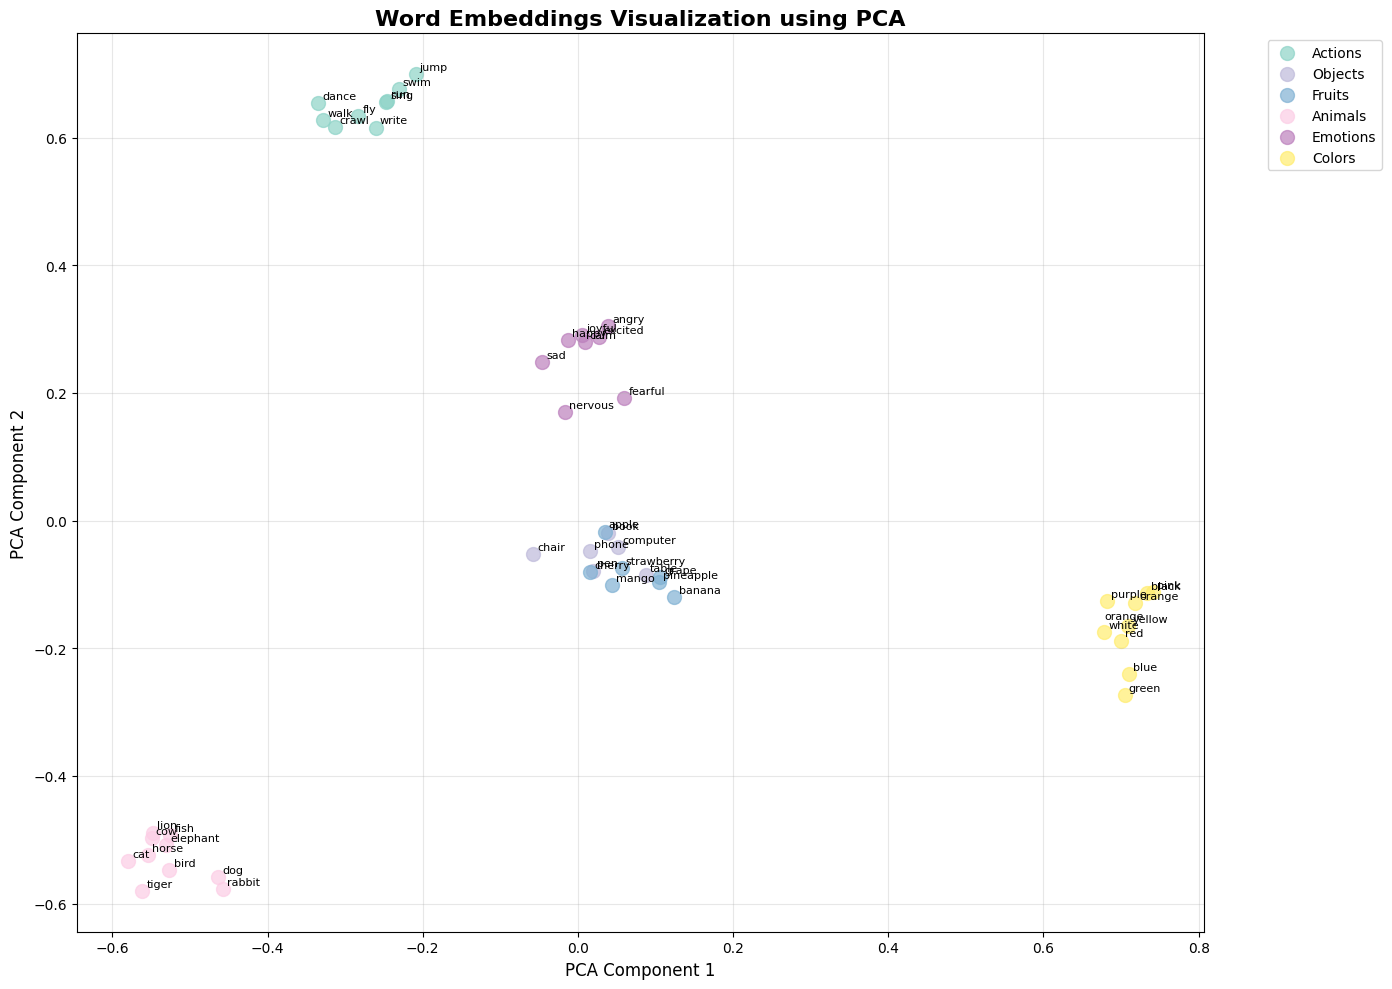

PCA Explained Variance Ratio: [0.19815887 0.17508516 0.16057045]
Total Explained Variance: 0.534



Most similar words to 'apple':
--------------------------------------------------
 1. strawberry      (similarity: 0.7898)
 2. mango           (similarity: 0.7809)
 3. pineapple       (similarity: 0.7744)
 4. cherry          (similarity: 0.7739)
 5. grape           (similarity: 0.7670)
 6. banana          (similarity: 0.7528)
 7. lion            (similarity: 0.1330)
 8. fly             (similarity: 0.1260)
 9. write           (similarity: 0.1231)
10. fearful         (similarity: 0.0873)


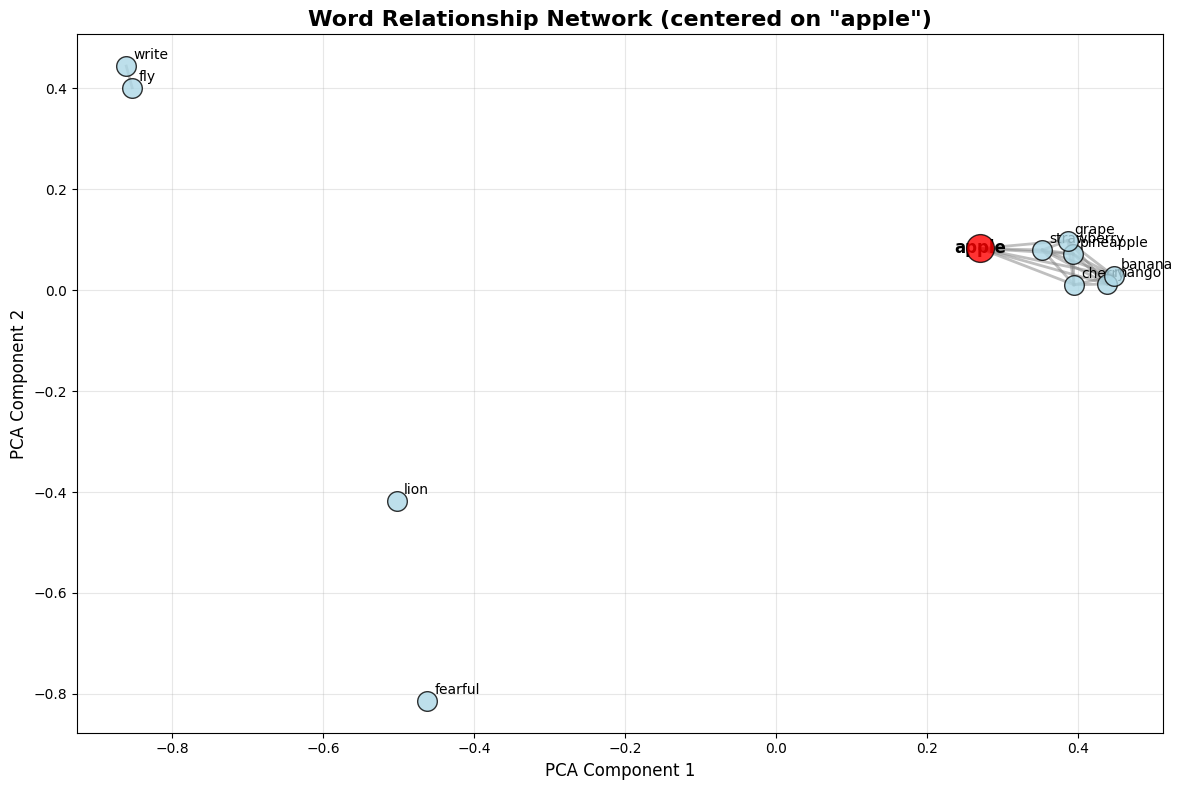

In [ ]:
# Create visualizer
visualizer = CustomWord2VecVisualizer()

# Option 1: Use sample data
visualizer.create_sample_embeddings(vocab_size=50, vector_dim=100)

# Option 2: Load from file (if you have one)
# visualizer.load_vectors_from_file('vectors.txt')

# Create visualizations
visualizer.plot_2d_vectors(method='pca')
visualizer.plot_3d_interactive()
visualizer.analyze_word_relationships('apple')

# NOTE :
# Silahkan ganti bagian visualizer.analyze_word_relationships('apple') dengan kata yang terdapat pada list :
# categories = {
        #     'Animals': ['cat', 'dog', 'elephant', 'lion', 'tiger', 'rabbit', 'horse', 'cow', 'bird', 'fish'],
        #     'Fruits': ['apple', 'banana', 'orange', 'grape', 'strawberry', 'mango', 'pineapple', 'cherry'],
        #     'Colors': ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'black', 'white', 'pink'],
        #     'Emotions': ['happy', 'sad', 'angry', 'excited', 'calm', 'nervous', 'joyful', 'fearful'],
        #     'Actions': ['run', 'walk', 'jump', 'swim', 'fly', 'crawl', 'dance', 'sing', 'write'],
        #     'Objects': ['table', 'chair', 'book', 'pen', 'computer', 'phone', 'car', 'house', 'door']
        # }

## No 4. Transformer Model (distilBERT)

src: https://huggingface.co/distilbert/distilbert-base-uncased

### Type using CPU (Raw)

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')
unmasker("I'am from [MASK] City.")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


[{'score': 0.18987944722175598,
  'token': 5111,
  'token_str': 'kansas',
  'sequence': "i ' am from kansas city."},
 {'score': 0.06299368292093277,
  'token': 3290,
  'token_str': 'mexico',
  'sequence': "i ' am from mexico city."},
 {'score': 0.036982081830501556,
  'token': 8515,
  'token_str': 'panama',
  'sequence': "i ' am from panama city."},
 {'score': 0.03201943263411522,
  'token': 5858,
  'token_str': 'oklahoma',
  'sequence': "i ' am from oklahoma city."},
 {'score': 0.01358364149928093,
  'token': 18867,
  'token_str': 'belize',
  'sequence': "i ' am from belize city."}]

### Type using GPU (Detail)

In [ ]:
from transformers import DistilBertForMaskedLM, DistilBertTokenizer
import torch

# Use the masked language model version
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForMaskedLM.from_pretrained('distilbert-base-uncased')

text = "Hello im from [MASK] city."
encoded_input = tokenizer(text, return_tensors='pt')

with torch.no_grad():
    output = model(**encoded_input)

# NOW output.logits exists!
print(f"Logits shape: {output.logits.shape}")  # [1, sequence_length, vocab_size]

# Find the [MASK] token position
mask_token_index = torch.where(encoded_input["input_ids"] == tokenizer.mask_token_id)[1]
mask_token_logits = output.logits[0, mask_token_index, :]

# Get top predictions
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

print("Top 5 predictions for [MASK]:")
for token in top_5_tokens:
    print(f"- {tokenizer.decode([token])}")

Logits shape: torch.Size([1, 8, 30522])
Top 5 predictions for [MASK]:
- kansas
- oklahoma
- panama
- vatican
- emerald


#### For Testing purpose only :

In [ ]:
## BROKEN JUST TO SAVE ##
from transformers import DistilBertForMaskedLM, DistilBertTokenizer
import torch

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForMaskedLM.from_pretrained('distilbert-base-uncased')

text = "Iam from [MASK]."
encoded_input = tokenizer(text, return_tensors='pt')

with torch.no_grad():
    output = model(**encoded_input)

# Get predictions for the [MASK] token
mask_token_index = torch.where(encoded_input["input_ids"] == tokenizer.mask_token_id)[1]
mask_token_logits = output.logits[0, mask_token_index, :]

# Get top 5 predictions
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

for token in top_5_tokens:
    print(f"Prediction: {tokenizer.decode([token])}")

Prediction: france
Prediction: japan
Prediction: london
Prediction: vietnam
Prediction: pakistan
